In [153]:
#TODO: implement perceptron
#MCAT Logistic algorithm
#Naive Bayes - done
#import training and test set - done

import os
import math
import string
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import random

In [187]:

pathImage1 =r'/users/secan/Desktop/hw3/landscape_photo3.jpg'
pathImage2 =r'/users/secan/Desktop/hw3/landscape_photo2.jpg'
pathImage3 =r'/users/secan/Desktop/hw3/landscape_photo1.jpg'
pathImage4 =r'/users/secan/Desktop/hw3/colorCombination.jpg'

im = cv2.imread(pathImage1)
im2 = cv2.imread(pathImage2)
im3 = cv2.imread(pathImage3)
im4 = cv2.imread(pathImage4)

image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

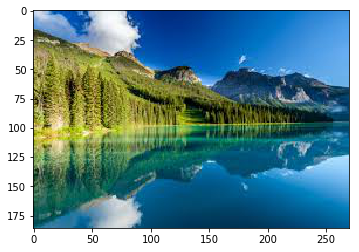

In [155]:
plt.imshow(image)
plt.imshow(image2)

In [188]:

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

pixel_values2 = image2.reshape((-1, 3))
# convert to float
pixel_values2 = np.float32(pixel_values2)

pixel_values3 = image3.reshape((-1, 3))
# convert to float
pixel_values3 = np.float32(pixel_values3)

pixel_values4 = image4.reshape((-1, 3))
# convert to float
pixel_values4 = np.float32(pixel_values4)



#type(pixel_values)

In [189]:
pixel_df = pd.DataFrame(pixel_values)
pixel_df2 = pd.DataFrame(pixel_values2)
pixel_df3 = pd.DataFrame(pixel_values3)
pixel_df4 = pd.DataFrame(pixel_values4)

In [159]:

def initialize_cluster_center(k):
  
  cluster_center = pd.DataFrame()
  for i in range(k):
    num1 = random.randint(0, 256)
    num2 = random.randint(0, 256)
    num3 = random.randint(0, 256)

    color_pixel_list = [num1,num2,num3]
    color_pixel_series = pd.Series(color_pixel_list)
    cluster_center = cluster_center.append(color_pixel_series, ignore_index = True)
  
  cluster_center = cluster_center
  return cluster_center




In [160]:
def distance_to_center(pixel_df,cluster_center, k):


  cluster_df = pd.DataFrame()
  center_length = len(cluster_center)

  for color in pixel_df:
    
    color_series = pd.Series(pixel_df[color])
   
    cluster_df = cluster_df.append(color_series, ignore_index=True)
    
  cluster_df = cluster_df.T

  cluster_list = []
  distance = np.zeros((pixel_df.shape[0], k))
  distance = np.transpose(distance)

  for i in range(k):
    cluster = cluster_df.sub(cluster_center.iloc[i, :])
    
    cluster_norm = np.linalg.norm(cluster_df[[0, 1, 2]].sub(np.array(cluster_center.iloc[i, :])), axis=1)

    distance[i, :] = np.square(cluster_norm)
   

  return distance



In [161]:
def classify_cluster(distance,pixel_df, k):
  
  class_arr = np.zeros(distance.shape[1], dtype = np.int64)

  
  class_df = pd.DataFrame()
  if (k==2):
    class_array = np.greater(distance[0], distance[1])

    class_series = pd.Series(class_array, name = "class_")

    classifica_df = pd.concat([pixel_df, class_series], axis=1, sort = True)
    class_df = classifica_df
  elif (k>=3):
    np.nan_to_num(distance)
    
    for index in range(distance.shape[1]):

      index_arr = np.zeros(distance.shape[0], dtype = np.int64)

      for i in range(k):

        index_arr[i] = distance[i][index]

      min_val = np.argmin(index_arr)

      class_arr[index] = min_val

    class_series = pd.Series(class_arr, name = "class_")

    classifica_df = pd.concat([pixel_df, class_series], axis=1, sort = True)
    class_df = classifica_df 
  elif(k==1):
    for index in range(distance.shape[1]):
        index_arr = np.zeros(distance.shape[0], dtype = np.int64)
        class_arr[index] = 0
    class_series = pd.Series(class_arr, name = "class_")

    classifica_df = pd.concat([pixel_df, class_series], axis=1, sort = True)
    class_df = classifica_df 
        
  
      
  return class_df
 



In [162]:
def compute_mean(class_df, k):

  new_centers = pd.DataFrame()
  if(k == 2):
    center2_df = class_df.loc[class_df["class_"] == True]
    
    center1_df = class_df.loc[class_df["class_"] == False]
    
    new_center_1_mean = center1_df.mean(axis=0)
    new_center_2_mean = center2_df.mean(axis=0)
    new_centers = pd.concat([new_center_1_mean,new_center_2_mean],axis = 1)
    
  elif(k >= 3):
  

    for index in range(k):
      center_df = class_df.loc[class_df["class_"] == index]
      center_df_mean = center_df.mean(axis=0)
      new_centers = pd.concat([new_centers, center_df_mean], axis = 1, sort = True)
  
  elif(k == 1):
    center_df = class_df.loc[class_df["class_"] == 0]
    center_df_mean = center_df.mean(axis=0)
    new_centers = pd.concat([new_centers, center_df_mean], axis = 1, sort = True)

  new_centers = new_centers.T
  new_centers = new_centers.drop("class_", axis=1)
  new_centers.reset_index(drop=True, inplace=True)
  new_centers = new_centers.fillna(0)

  return new_centers

In [163]:
def rewrite_image(classif_df, old_centers, pix_values, k):
 
  rewritten_pixels = np.zeros((pix_values.shape[0], pix_values.shape[1]))

  mean_arr = []

  for i in range(k):
    mean_arr.append(old_centers.loc[i,:].tolist())
    

  for index in mean_arr: 
    index = list(map(int, index)) 

  count = 0

  for class_val in classif_df["class_"]:
    for i in range(k):
      if(class_val == i):
        rewritten_pixels[count,:] = mean_arr[i]

        count+=1
        
  count = 0

  return rewritten_pixels

In [164]:
def show_new_image(rewritten_pixel_arr, initial_image):
  fl = rewritten_pixel_arr.flatten() 
  
  mat = fl.reshape(initial_image.shape[0], initial_image.shape[1], initial_image.shape[2])
  
  new_mat = mat.astype(np.int)
  plt.imshow(new_mat)



In [165]:
from PIL import Image

def main_function(img_df, pix_vals, initial_image, k):
  old_centers = initialize_cluster_center(k)
  
  classification_df = pd.DataFrame()
  j=0
  while j<10:
    dist = distance_to_center(img_df, old_centers, k)
    classification_df = classify_cluster(dist,img_df,k)
    new_centers = compute_mean(classification_df,k)
    
    old_centers = new_centers
    j+=1

  rewrite_pixels = rewrite_image(classification_df,old_centers,pix_vals, k)
  show_new_image(rewrite_pixels, initial_image)



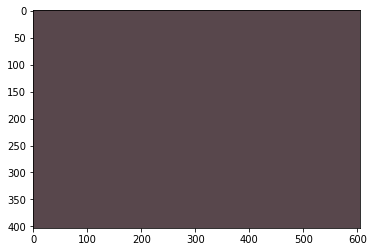

In [166]:
main_function(pixel_df, pixel_values, image, 1)

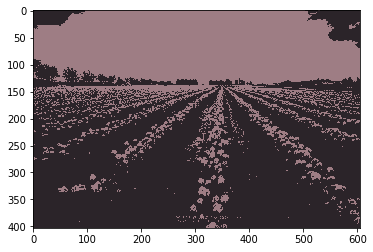

In [167]:
main_function(pixel_df, pixel_values, image, 2)

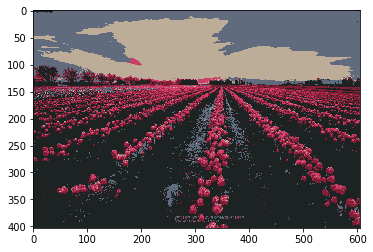

In [168]:
main_function(pixel_df, pixel_values, image, 5)

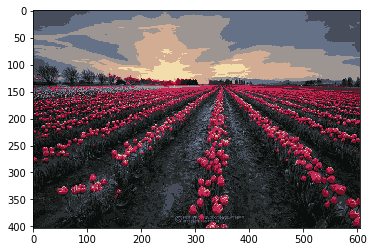

In [169]:
main_function(pixel_df, pixel_values, image, 10)

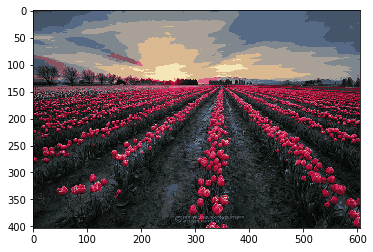

In [170]:
main_function(pixel_df, pixel_values, image, 20)

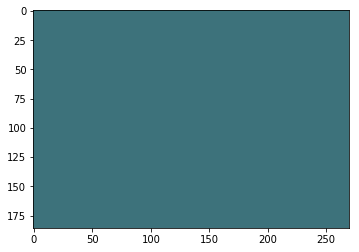

In [171]:
main_function(pixel_df2, pixel_values2, image2, 1)

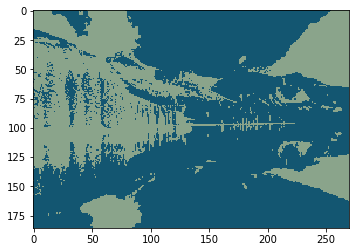

In [172]:
main_function(pixel_df2, pixel_values2, image2, 2)

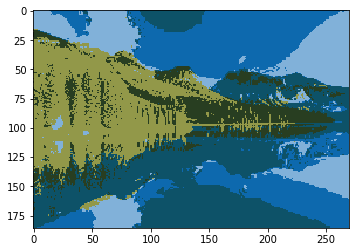

In [173]:
main_function(pixel_df2, pixel_values2, image2, 5)

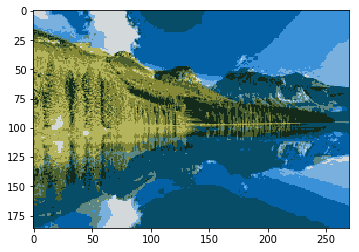

In [174]:
main_function(pixel_df2, pixel_values2, image2, 10)

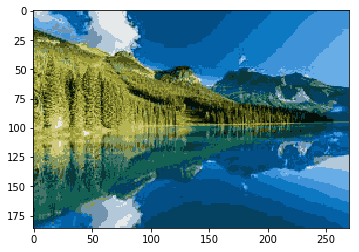

In [175]:
main_function(pixel_df2, pixel_values2, image2, 20)

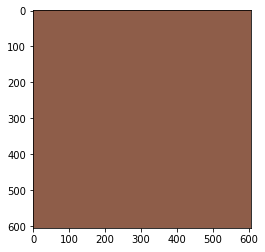

In [176]:
main_function(pixel_df3, pixel_values3, image3, 1)

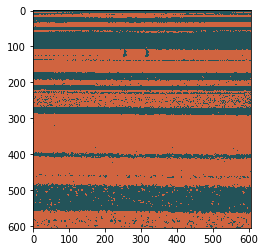

In [177]:
main_function(pixel_df3, pixel_values3, image3, 2)

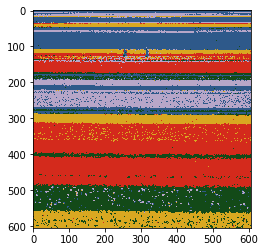

In [178]:
main_function(pixel_df3, pixel_values3, image3, 5)

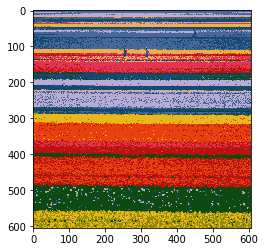

In [179]:
main_function(pixel_df3, pixel_values3, image3, 10)

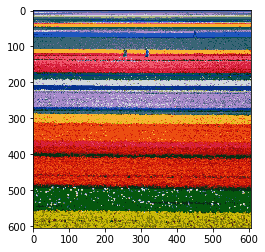

In [180]:
main_function(pixel_df3, pixel_values3, image3, 20)

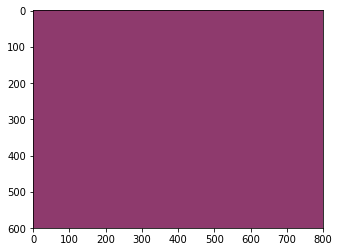

In [190]:
main_function(pixel_df4, pixel_values4, image4, 1)

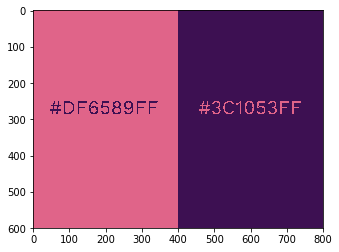

In [191]:
main_function(pixel_df4, pixel_values4, image4, 2)